<a href="https://colab.research.google.com/github/babarmalik6444/CodeChallenge/blob/main/SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fuel = pd.read_csv('/content/FuelConsumption.csv')
fuel.head()

In [ ]:
fuel.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
fuell = fuel[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
fuell.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [ ]:
fuell.corr()

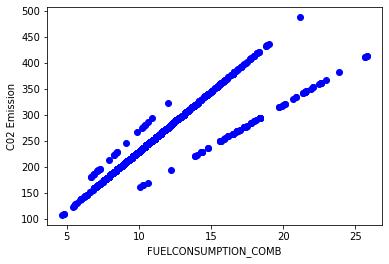

In [ ]:
plt.scatter(fuell.FUELCONSUMPTION_COMB, fuell.CO2EMISSIONS,color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('C02 Emission')
plt.show()

In [ ]:
indx = np.random.rand(len(fuell)) <0.8
train = fuell[indx]
test = fuell[~indx]


In [ ]:
test.head()

In [ ]:
from sklearn import linear_model
lreg = linear_model.LinearRegression()

In [ ]:
#training
X = np.asanyarray(train['FUELCONSUMPTION_COMB'])
y= np.asanyarray(train['CO2EMISSIONS'])
lreg.fit(X.reshape(-1,1),y)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Theta-0', lreg.coef_)
print('Theta-1', lreg.intercept_)

Theta-0 [16.34393327]
Theta-1 67.28356017176094


In [ ]:
lreg.predict([[2.5]])

array([222.38354162])

In [ ]:
test_X = np.asanyarray(test['FUELCONSUMPTION_COMB'])
test_y = np.asanyarray(test['CO2EMISSIONS'])
y_hat = lreg.predict(test_X.reshape(-1,1))


In [ ]:
print('MSE is:  %2f' %np.mean(test_y - y_hat) **2)

MSE is:  2.665370


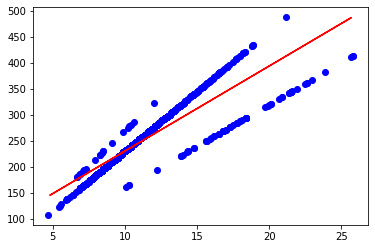

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,color = 'blue')
plt.plot(test_X, y_hat, 'r-')
